# 🐢 Gerekli Kütüphaneler

Bu kodda görüntü işleme, veri analizi ve makine öğrenimi için kullanılan çeşitli kütüphaneler ve modüller import edilmiştir.

### 📂 Dosya ve Dizini Yönetimi
- **os, shutil**: Dosya ve dizin işlemleri.

### 🔢 Sayısal Hesaplama
- **numpy**: Matematiksel işlemler ve diziler.

### 📊 Veri Görselleştirme
- **matplotlib.pyplot**: Grafik çizimi.
- **seaborn**: İstatistiksel veri görselleştirme.

### 🧠 Makine Öğrenimi ve Modelleme
- **sklearn**: Veri işleme ve model değerlendirme (ör. `LabelEncoder`, `train_test_split`, `confusion_matrix`).

### 🖼️ Görüntü İşleme
- **tensorflow.keras.preprocessing.image**: Görüntü işleme.
- **cv2 (OpenCV)**: İleri düzey görüntü işleme.
- **Pillow (PIL)**: Görüntü filtreleme.

### 🏗️ Derin Öğrenme
- **tensorflow.keras.models**: Model oluşturma (`Sequential`).
- **tensorflow.keras.layers**: Katmanlar (ör. `Conv2D`, `Dense`, `Dropout`).
- **tensorflow.keras.optimizers**: Optimizasyon algoritmaları (ör. `Adam`).
- **tensorflow.keras.callbacks**: Eğitim süreçlerini optimize etme (ör. `EarlyStopping`).



In [1]:
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
import random
import cv2
from PIL import Image, ImageFilter
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


# 🐾 Kodun Global Ayarları

Bu bölümde, kodun çalışmasında kullanılan global ayarlar ve sabitler tanımlanmıştır.


In [2]:
# Global Settings
SUPPORTED_EXTENSIONS = {'.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp'}
TARGET_SIZE = (224, 224)
MAX_IMAGES_PER_CLASS = 650

# Class Names
CLASSES = ['collie', 'dolphin', 'elephant', 'fox', 'moose', 'rabbit', 'sheep', 'squirrel', 'giant+panda', 'polar+bear']

# File Paths
SOURCE_FOLDER = '/kaggle/input/animals-with-attributes-2/Animals_with_Attributes2/JPEGImages'
TARGET_FOLDER = '/kaggle/working/secilmis_veri'

# Her Klasördeki Fotoğraf Sayısını Hesaplama 

Bu fonksiyon, verilen bir klasörün içindeki her alt klasördeki fotoğraf sayısını hesaplar. İşte kodun kısa bir açıklaması:

```python
def count_photos_in_each_folder(folder_path):
    photo_counts = {}  # Klasör isimleri ve fotoğraf sayıları için bir sözlük oluşturulur
    for root, _, files in os.walk(folder_path):  # Klasör ve alt klasörlerde gezilir
        folder_name = os.path.basename(root)  # Geçerli klasörün ismi alınır
        photo_count = sum(1 for file in files if os.path.splitext(file)[1].lower() in SUPPORTED_EXTENSIONS)  # Geçerli fotoğraf uzantısına sahip dosyalar sayılır
        photo_counts[folder_name] = photo_count  # Fotoğraf sayısı sözlüğe eklenir
    return photo_counts  # Klasör isimleri ve fotoğraf sayıları döndürülür


In [3]:
# Count Photos in Each Folder
def count_photos_in_each_folder(folder_path):
    photo_counts = {}
    for root, _, files in os.walk(folder_path):
        folder_name = os.path.basename(root)
        photo_count = sum(1 for file in files if os.path.splitext(file)[1].lower() in SUPPORTED_EXTENSIONS)
        photo_counts[folder_name] = photo_count
    return photo_counts

# Verileri Düzenleme 

Bu fonksiyon, belirtilen kaynak klasördeki fotoğrafları, her biri belirli bir sınıfa ait olmak üzere hedef klasöre düzenli bir şekilde kopyalar. Her sınıf için, belirlenen maksimum sayıda fotoğraf kopyalanır. Kopyalanan fotoğraflar, her sınıf için ayrı bir alt klasöre yerleştirilir.

#### Temel Amaç:
- Kaynak klasördeki fotoğrafları sınıf bazında hedef klasöre organize bir şekilde kopyalamak.
- Her sınıf için belirli bir maksimum fotoğraf sayısına ulaşmak.
- Kopyalanan fotoğraflar, her sınıf için ayrı bir alt klasöre yerleştirilir.

#### Temel Noktalar:
- Kaynak ve hedef klasörler arasındaki yolu oluşturur.
- Fotoğrafları yalnızca desteklenen uzantılara göre seçer.
- Kopyalama işleminde her sınıf için maksimum resim sayısına ulaşılana kadar fotoğraf kopyalar.


In [4]:
# Organize Data
def organize_data(source_folder, target_folder, classes, max_images=MAX_IMAGES_PER_CLASS):
    for class_name in classes:
        class_source_path = os.path.join(source_folder, class_name)
        class_target_path = os.path.join(target_folder, class_name)
        os.makedirs(class_target_path, exist_ok=True)

        image_count = 0
        for file in os.listdir(class_source_path):
            if os.path.splitext(file)[1].lower() in SUPPORTED_EXTENSIONS:
                if image_count >= max_images:
                    break
                shutil.copy(os.path.join(class_source_path, file), os.path.join(class_target_path, file))
                image_count += 1

        print(f"{class_name} class: {image_count} images copied.")
    print("Data organization completed!")

# Fotoğraf Sayılarını Görselleştirme

Bu fonksiyon, her klasördeki fotoğraf sayısını çubuk grafik şeklinde görselleştirir. Klasörler ile fotoğraf sayıları arasındaki ilişkiyi görsel olarak sunar.


In [5]:
# Plot Photo Counts
def plot_photo_counts(photo_counts, title):
    folders, counts = list(photo_counts.keys()), list(photo_counts.values())
    plt.figure(figsize=(12, 6))
    plt.bar(folders, counts, color='skyblue')
    plt.xlabel('Folders')
    plt.ylabel('Photo Count')
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Görüntü Manipülasyonu Fonksiyonları 

Bu fonksiyonlar, bir görüntü üzerinde çeşitli manipülasyonlar (gürültü ekleme, bulanıklaştırma, döndürme, yakınlaştırma) yaparak görüntü augmentasyonu (çoğaltma) sağlar. Görüntüler üzerinde farklı değişiklikler uygulayarak modelin eğitiminde çeşitlilik yaratılır.

#### Temel Amaç:
- Görüntüleri çeşitli şekillerde manipüle ederek eğitim veri setini zenginleştirmek.
- Görüntü üzerinde rastgele bir manipülasyon uygulayarak modelin genel performansını artırmak.

#### Fonksiyonlar:
1. **add_noise(image, noise_factor)**: Görüntüye rastgele gürültü ekler.
2. **blur_image(image, blur_radius)**: Görüntüyü bulanıklaştırır.
3. **rotate_image(image, angle)**: Görüntüyü belirli bir açıyla döndürür.
4. **zoom_image(image, zoom_factor)**: Görüntüyü belirli bir faktörde yakınlaştırır.

#### Augment Image:
- **augment_image(image)**: Yukarıdaki manipülasyonlardan birini rastgele seçer ve uygulayarak görüntüyü çoğaltır.


In [6]:
# Image Manipulation Functions
def add_noise(image, noise_factor=0.2):
    gauss = np.random.normal(0, noise_factor, image.shape)
    return np.clip(image + gauss, 0, 1)

def blur_image(image, blur_radius=2):
    pil_image = Image.fromarray((image * 255).astype(np.uint8))
    blurred_image = pil_image.filter(ImageFilter.GaussianBlur(radius=blur_radius))
    return np.array(blurred_image) / 255.0

def rotate_image(image, angle=15):
    rows, cols = image.shape[:2]
    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    rotated_image = cv2.warpAffine((image * 255).astype(np.uint8), M, (cols, rows))
    return rotated_image / 255.0

def zoom_image(image, zoom_factor=1.2):
    h, w = image.shape[:2]
    center_x, center_y = w // 2, h // 2

    # Calculate cropping box dimensions
    new_w = int(w / zoom_factor)
    new_h = int(h / zoom_factor)

    # Ensure cropping dimensions are within bounds
    x1 = max(center_x - new_w // 2, 0)
    x2 = min(center_x + new_w // 2, w)
    y1 = max(center_y - new_h // 2, 0)
    y2 = min(center_y + new_h // 2, h)

    # Crop the image
    cropped_img = image[y1:y2, x1:x2]

    # Handle cases where crop dimensions are invalid
    if cropped_img.shape[0] == 0 or cropped_img.shape[1] == 0:
        return image  # Return original image if cropping fails

    # Resize cropped image back to original size
    zoomed_img = cv2.resize(cropped_img, (w, h), interpolation=cv2.INTER_LINEAR)

    return zoomed_img


# Augment Image
def augment_image(image):
    augmentation_type = random.choice(['blur', 'noise', 'rotate', 'zoom'])
    if augmentation_type == 'blur':
        return blur_image(image), 'Blur'
    elif augmentation_type == 'noise':
        return add_noise(image), 'Noise'
    elif augmentation_type == 'rotate':
        return rotate_image(image), 'Rotation'
    elif augmentation_type == 'zoom':
        return zoom_image(image), 'Zoom'
    return image, 'None'

# Klasördeki Görüntüleri İşleme 

Bu fonksiyon, belirtilen bir klasördeki tüm görüntüleri işler, her bir görüntüye augmentasyon uygular ve etiketleriyle birlikte döndürür. Ayrıca, her sınıf için örnek görselleri kullanıcıya gösterir.

#### Temel Amaç:
- Bir dizindeki tüm görüntüleri yüklemek, işlemek ve augmentasyon uygulayarak eğitim için hazır hale getirmek.
- Görüntülere rastgele manipülasyonlar uygulayarak veri setini artırmak ve çeşitlendirmek.

#### Fonksiyonun Çalışma Adımları:
1. **Görüntülerin Yüklenmesi ve İşlenmesi**: 
   - Belirtilen klasördeki her alt klasör (etiket) için görseller yüklenir ve boyutları yeniden ayarlanır.
   
2. **Augmentasyon Uygulama**: 
   - Her görsele rastgele bir augmentasyon (bulanıklaştırma, gürültü, döndürme, yakınlaştırma) uygulanır.

3. **Örnek Görsellerin Gösterilmesi**:
   - Her sınıf için augmentasyon örnekleri, yalnızca ilk kez karşılaşılan sınıf için kullanıcıya gösterilir.

4. **Sonuçların Döndürülmesi**:
   - İşlenmiş ve augmentasyona uğramış görseller ile etiketler bir listeye eklenir ve numpy dizisi olarak döndürülür.

#### Çıktı:
- **processed_images**: Augmentasyon uygulanmış ve işlenmiş görsellerin numpy dizisi.
- **labels**: Görsellerin ait olduğu etiketlerin numpy dizisi.


In [7]:
# Process Images from Directory
def process_images_from_directory(directory_path, target_size=TARGET_SIZE):
    processed_images, labels, shown_classes = [], [], set()
    for label in os.listdir(directory_path):
        label_path = os.path.join(directory_path, label)
        if os.path.isdir(label_path):
            for image_name in os.listdir(label_path):
                image_path = os.path.join(label_path, image_name)
                img = load_img(image_path, target_size=target_size)
                img_array = img_to_array(img) / 255.0

                augmented_img, augmentation_type = augment_image(img_array)
                if label not in shown_classes:
                    show_image_examples(img_array, augmented_img, augmentation_type, label)
                    shown_classes.add(label)

                processed_images.append((augmented_img * 255).astype(np.uint8))
                labels.append(label)
    return np.array(processed_images), np.array(labels)

# Görüntü Örneklerini Gösterme 

Bu fonksiyon, orijinal ve augmentasyona uğramış iki görüntüyü yan yana göstererek kullanıcının yapılan manipülasyonları görsel olarak incelemesini sağlar.

#### Temel Amaç:
- Orijinal ve augmentasyona uğramış görüntüleri yan yana görselleştirerek, yapılan manipülasyonun etkilerini görsel olarak sunmak.

#### Fonksiyonun Çalışma Adımları:
1. **Görüntülerin Görselleştirilmesi**: 
   - `original` (orijinal görüntü) ve `augmented` (augmentasyona uğramış görüntü) olmak üzere iki görüntü yan yana yerleştirilir.
   
2. **Başlıkların Eklenmesi**:
   - Her iki görüntüye ait başlıklar, sırasıyla orijinal ve augmentasyon tipi ile birlikte eklenir.

3. **Görsellerin Gösterilmesi**:
   - `plt.show()` fonksiyonu ile görseller ekranda gösterilir.

#### Çıktı:
- Orijinal ve augmentasyona uğramış görüntüler, her ikisinin de etiketlendiği şekilde yan yana gösterilir.


In [8]:
# Show Image Examples
def show_image_examples(original, augmented, augmentation_type, class_name):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(original)
    axes[0].set_title(f"Original Image: {class_name}")
    axes[1].imshow(augmented)
    axes[1].set_title(f"Augmented ({augmentation_type}): {class_name}")
    plt.show()

### Ana İşlem Süreci 

Bu fonksiyon, veri hazırlık sürecinin tüm adımlarını sırayla gerçekleştirir: fotoğraf sayımlarının yapılması, verilerin düzenlenmesi, görüntülerin işlenmesi, etiketlerin kodlanması ve verilerin eğitim/test setlerine bölünmesi. Ayrıca her aşamada verilerin görselleştirilmesi sağlanır.

#### Temel Amaç:
- Görüntü verilerini düzenleyip işleyerek modelin eğitilmesine uygun hale getirmek.
- Verilerin görselleştirilmesi ve manipülasyonu sırasında her aşamanın izlenebilirliğini sağlamak.

#### Fonksiyonun Çalışma Adımları:
1. **Kaynak Fotoğraflarının Sayılması ve Görselleştirilmesi**: 
   - Kaynak klasördeki fotoğrafların sayısı hesaplanır ve görselleştirilir.
   
2. **Verilerin Düzenlenmesi**: 
   - Kaynak klasördeki fotoğraflar, hedef klasöre sınıflarına göre düzenlenir.

3. **Hedef Fotoğraflarının Sayılması ve Görselleştirilmesi**: 
   - Hedef klasördeki fotoğrafların sayısı hesaplanır ve görselleştirilir.

4. **Görüntülerin İşlenmesi ve Görselleştirilmesi**: 
   - Hedef klasördeki fotoğraflar işlenir ve augmentasyon uygulandıktan sonra örnekler gösterilir.

5. **Etiketlerin Kodlanması ve Verilerin Eğitim/Test Setlerine Bölünmesi**:
   - Etiketler sayısal değerlere dönüştürülür ve veriler eğitim (training) ve test (test) setlerine ayrılır.
   - Etiketler one-hot encoding ile kategorik hale getirilir.

6. **Sonuçların Yazdırılması**:
   - Eğitim ve test setlerinin boyutları yazdırılır.

#### Çıktılar:
- **X_train, X_test**: Eğitim ve test setlerine bölünmüş görüntü verileri.
- **y_train, y_test**: Eğitim ve test setlerine bölünmüş etiketler, one-hot encoding uygulanmış.


In [9]:
# Main Process
def main_process():
    # Count and Display Source Photos
    photo_counts = count_photos_in_each_folder(SOURCE_FOLDER)
    print("Photo counts in folders:", photo_counts)
    plot_photo_counts(photo_counts, 'Photo Counts per Folder')

    # Organize Data
    organize_data(SOURCE_FOLDER, TARGET_FOLDER, CLASSES)

    # Count and Display Target Photos
    target_photo_counts = count_photos_in_each_folder(TARGET_FOLDER)
    print("Photo counts in target folder:", target_photo_counts)
    plot_photo_counts(target_photo_counts, 'Photo Counts in Target Folder')

    # Process and Visualize Images
    images, labels = process_images_from_directory(TARGET_FOLDER)
    print(f"Image dimensions: {images.shape}")
    print(f"Total labels: {len(labels)}")

    # Encode Labels and Split Data
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(labels)
    X_train, X_test, y_train, y_test = train_test_split(images / 255.0, y_encoded, test_size=0.3, random_state=42)

    y_train = to_categorical(y_train, num_classes=len(CLASSES))
    y_test = to_categorical(y_test, num_classes=len(CLASSES))

    print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")
    print(f"Training examples: {y_train.shape[0]}, Test examples: {y_test.shape[0]}")
    return X_train, X_test, y_train, y_test

# Ana Sürecin Çalıştırılması 
Bu satır, daha önce tanımlanan **`main_process()`** fonksiyonunu çalıştırır ve çıktıları, eğitim (X_train) ve test (X_test) verileri ile etiketler (y_train, y_test) olarak döndürür.

#### Temel Amaç:
- Veri hazırlık sürecini başlatmak ve sonuçları eğitim ve test setlerine ayırarak model eğitimi için hazır hale getirmek.

#### Çalışma Adımları:
- **`main_process()`** fonksiyonu, verilerin sayımları, düzenlenmesi, augmentasyonu ve eğitim/test setlerine bölünmesi işlemlerini sırasıyla gerçekleştirir.
- Sonuç olarak, fonksiyon:
  - **X_train** ve **X_test**: Eğitim ve test setleri için görsellerin numpy dizilerini döndürür.
  - **y_train** ve **y_test**: Eğitim ve test setleri için one-hot encoded etiketleri döndürür.

Bu işlem tamamlandığında, model eğitimi için veriler hazır hale gelir.


Photo counts in folders: {'JPEGImages': 0, 'fox': 664, 'wolf': 589, 'horse': 1645, 'antelope': 1046, 'hamster': 779, 'skunk': 188, 'chimpanzee': 728, 'lion': 1019, 'otter': 758, 'giant+panda': 874, 'raccoon': 512, 'hippopotamus': 684, 'bobcat': 630, 'pig': 713, 'rat': 310, 'spider+monkey': 291, 'buffalo': 895, 'mouse': 185, 'tiger': 877, 'bat': 383, 'grizzly+bear': 852, 'gorilla': 872, 'dalmatian': 549, 'killer+whale': 291, 'siamese+cat': 500, 'humpback+whale': 709, 'chihuahua': 567, 'beaver': 193, 'polar+bear': 868, 'german+shepherd': 1033, 'elephant': 1038, 'sheep': 1420, 'collie': 1028, 'moose': 704, 'zebra': 1170, 'seal': 988, 'cow': 1338, 'ox': 728, 'mole': 100, 'rabbit': 1088, 'giraffe': 1202, 'persian+cat': 747, 'rhinoceros': 696, 'dolphin': 946, 'blue+whale': 174, 'squirrel': 1200, 'leopard': 720, 'deer': 1344, 'weasel': 272, 'walrus': 215}


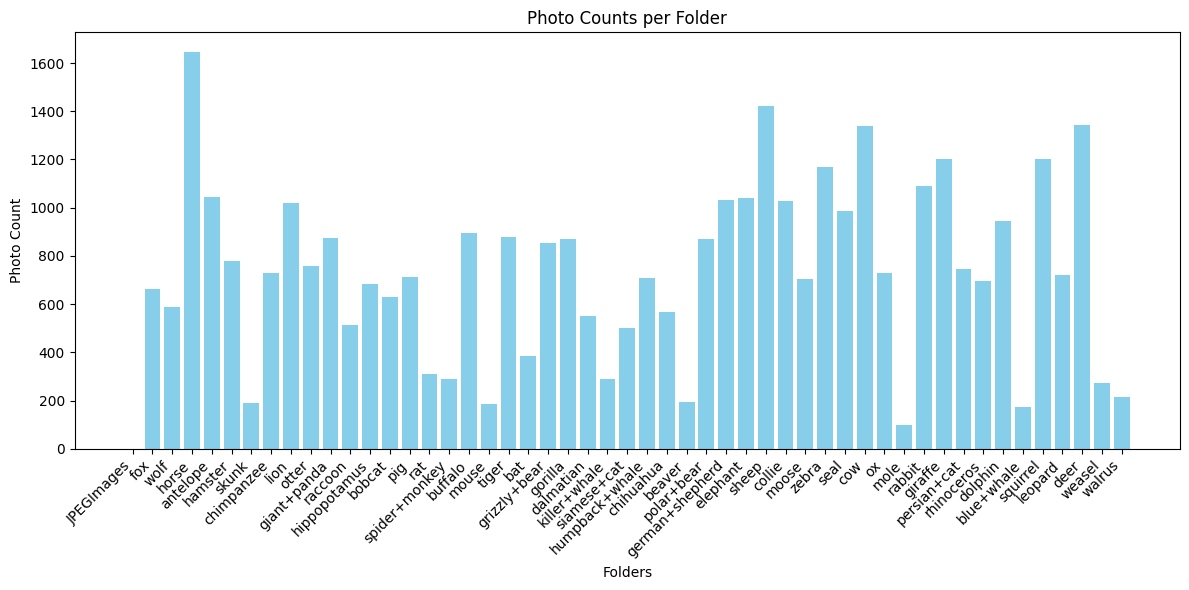

collie class: 650 images copied.
dolphin class: 650 images copied.
elephant class: 650 images copied.
fox class: 650 images copied.
moose class: 650 images copied.
rabbit class: 650 images copied.
sheep class: 650 images copied.
squirrel class: 650 images copied.
giant+panda class: 650 images copied.
polar+bear class: 650 images copied.
Data organization completed!
Photo counts in target folder: {'secilmis_veri': 0, 'giant+panda': 650, 'squirrel': 650, 'sheep': 650, 'collie': 650, 'fox': 650, 'dolphin': 650, 'elephant': 650, 'polar+bear': 650, 'moose': 650, 'rabbit': 650}


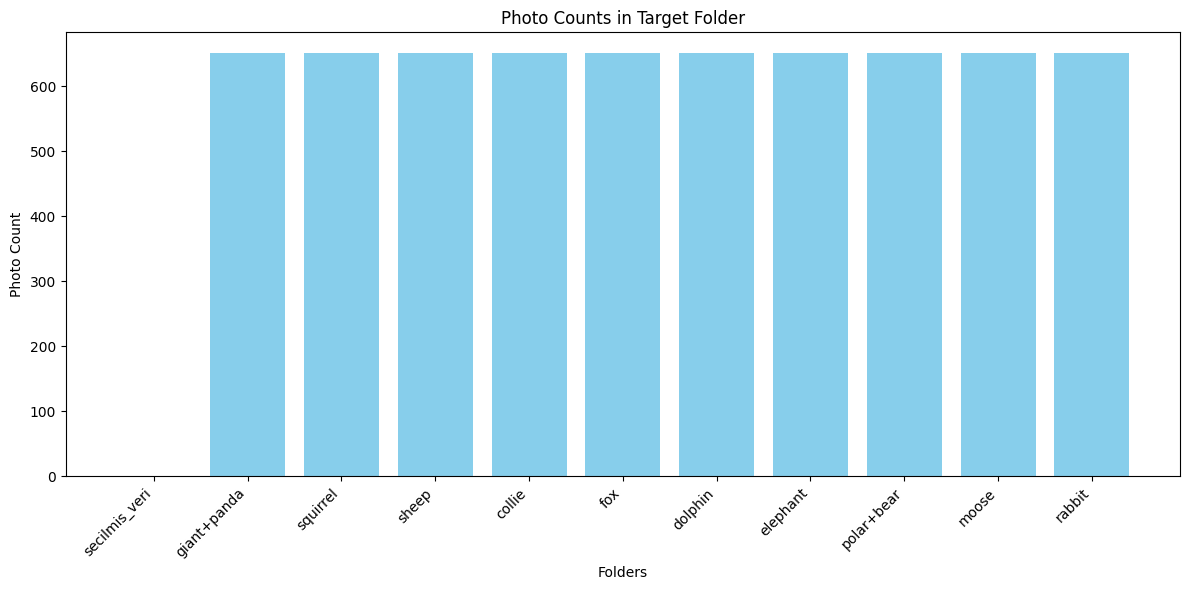

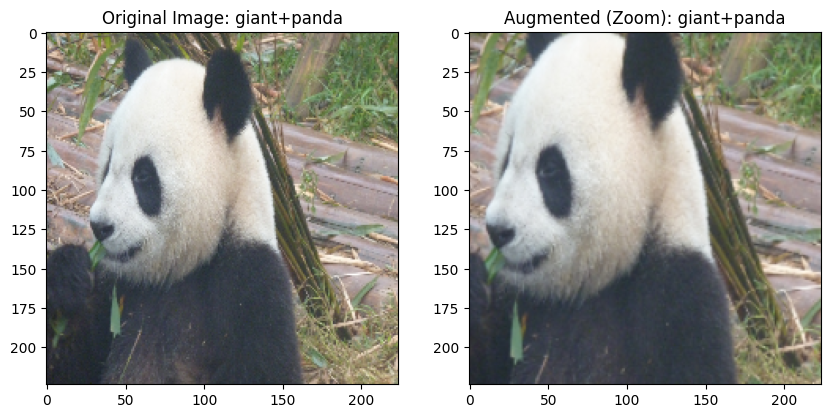

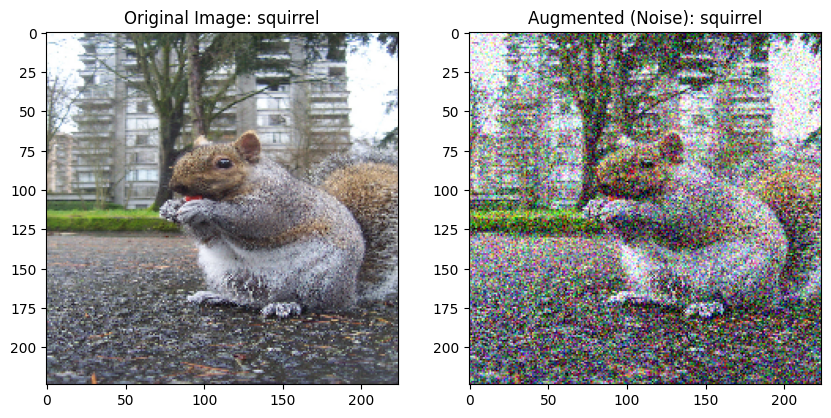

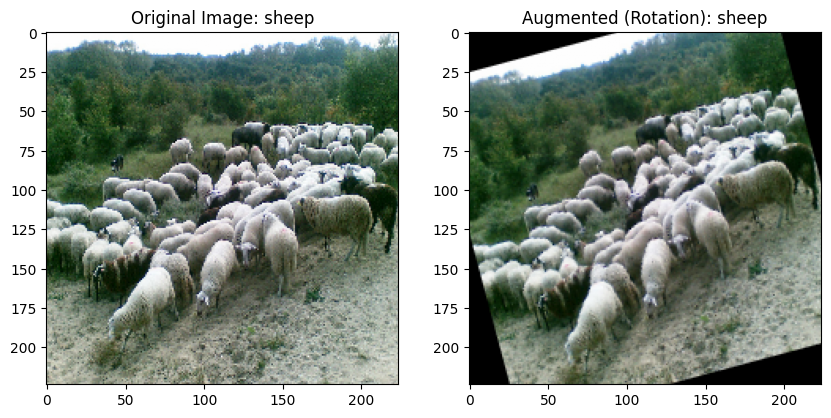

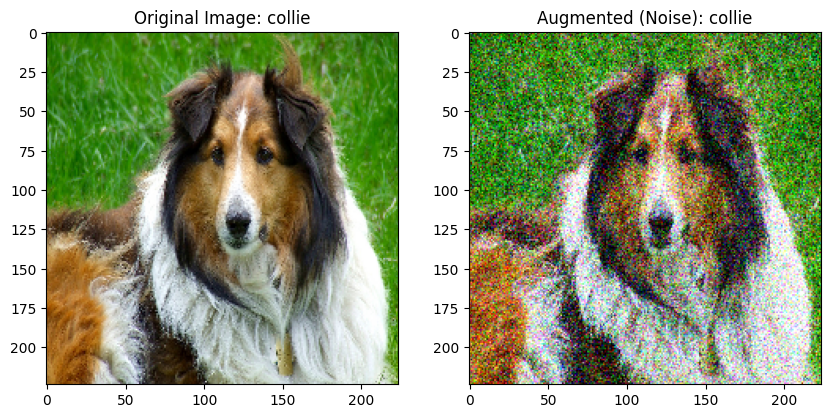

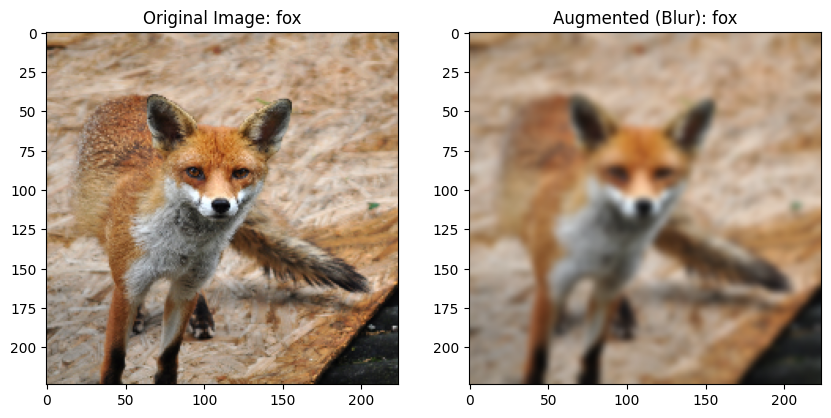

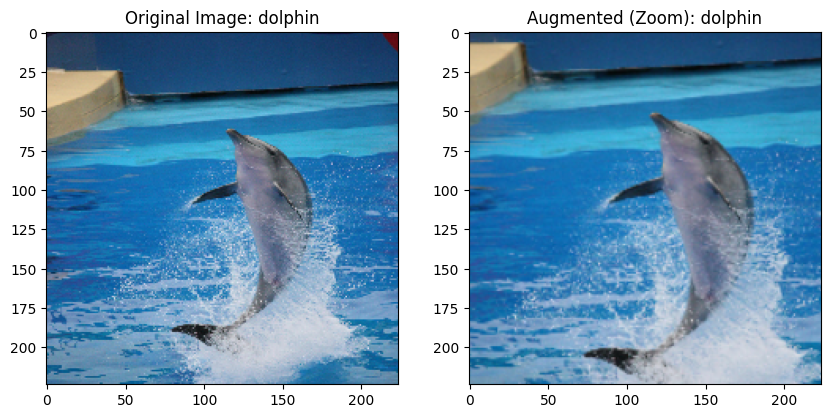

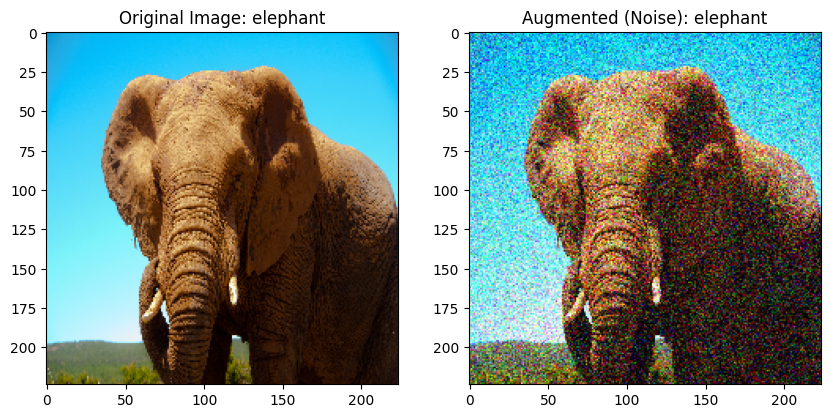

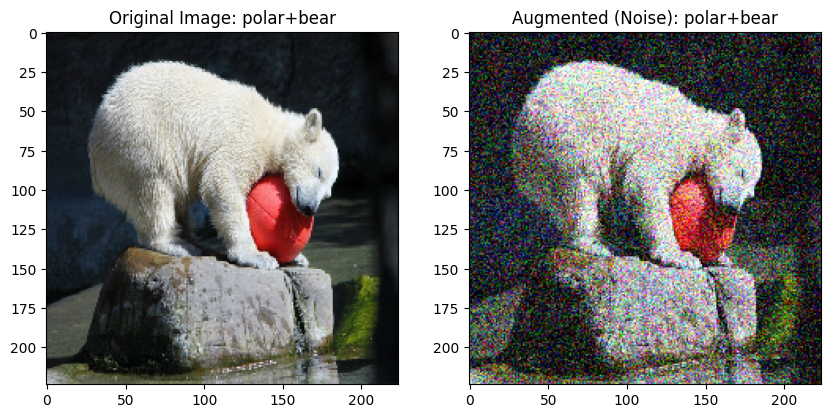

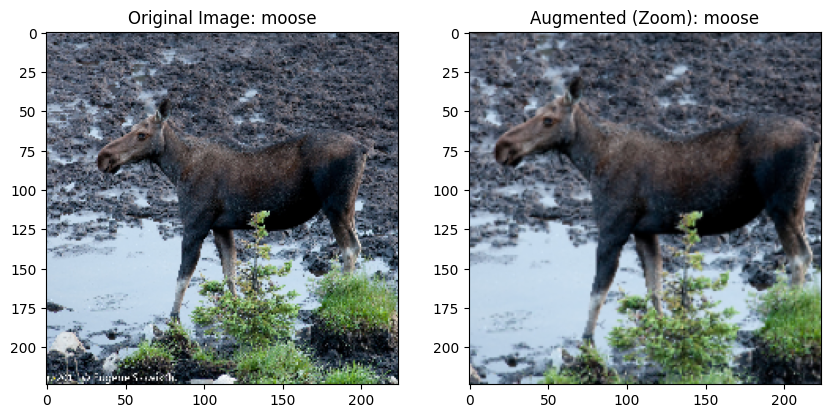

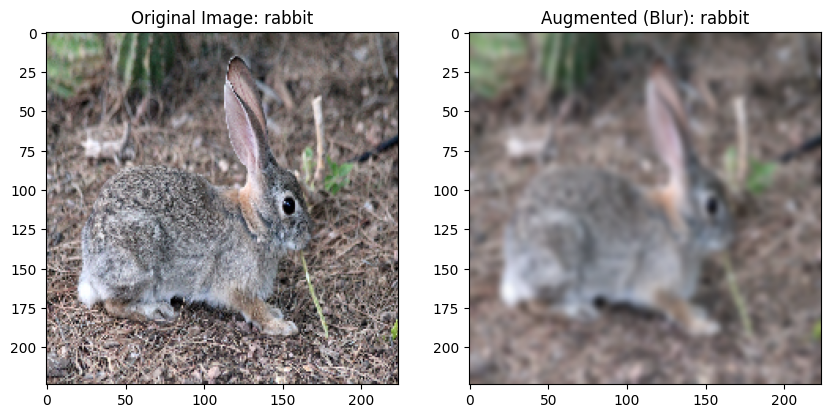

Image dimensions: (6500, 224, 224, 3)
Total labels: 6500
Training set size: (4550, 224, 224, 3), Test set size: (1950, 224, 224, 3)
Training examples: 4550, Test examples: 1950


In [10]:
# Execute Main Process
X_train, X_test, y_train, y_test = main_process()

### CNN Model Tanımlama 

Bu kod, derin öğrenme tabanlı bir **Konvolüsyonel Sinir Ağı (CNN)** modeli tanımlar. Model, görüntü sınıflandırma için kullanılacak ve 3 konvolüsyonel blok, yoğun (fully connected) katmanlar ile yapılandırılmıştır.

#### Temel Amaç:
- Görüntü sınıflandırma için bir CNN modelini tanımlamak ve eğitmek.
- Verilen verilerle sınıflandırma yapmak için uygun bir model oluşturmak.

#### Modelin Yapısı:
1. **İlk Konvolüsyon Bloğu**:
   - 32 filtre ile 3x3 boyutunda konvolüsyonel katman.
   - BatchNormalization ile normalizasyon.
   - ReLU aktivasyon fonksiyonu.
   - MaxPooling2D ile 2x2 boyutunda havuzlama.
   - Dropout ile %25 oranında düzensizlik öncesi katman.

2. **İkinci Konvolüsyon Bloğu**:
   - 64 filtre ile 3x3 boyutunda konvolüsyonel katman.
   - BatchNormalization ve ReLU aktivasyonu.
   - MaxPooling2D ile 2x2 havuzlama.
   - Dropout ile %25 oranında düzensizlik.

3. **Üçüncü Konvolüsyon Bloğu**:
   - 128 filtre ile 3x3 boyutunda konvolüsyonel katman.
   - BatchNormalization ve ReLU aktivasyonu.
   - MaxPooling2D ile 2x2 havuzlama.
   - Dropout ile %25 oranında düzensizlik.

4. **Yoğun Katmanlar (Fully Connected Layers)**:
   - `Flatten` ile katmanları tek boyutlu hale getirir.
   - 256 nöronlu bir `Dense` katman ve BatchNormalization ile normalizasyon.
   - Dropout ile %50 oranında düzensizlik.

5. **Çıkış Katmanı**:
   - **Softmax** aktivasyon fonksiyonu ile sınıflandırma yapar.
   - Çıkış katmanı, `len(CLASSES)` kadar nörona sahip olup sınıflandırma işlemi gerçekleştirir.

#### Modelin Derlenmesi:
- **Optimizer**: Adam optimizasyon algoritması, öğrenme oranı 0.001.
- **Loss Function**: `categorical_crossentropy`, çok sınıflı sınıflandırma kaybı.
- **Metrics**: `accuracy`, doğruluk ölçütü kullanılır.

#### Model Özeti:
- `model.summary()` fonksiyonu ile modelin yapısı ve katmanları hakkında özet bilgi yazdırılır.

Bu model, görüntü verilerini işleyerek sınıflandırma yapmaya uygundur.


In [11]:
# CNN Model Tanımlama
model = Sequential()

# İlk Konvolüsyon Bloğu
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# İkinci Konvolüsyon Bloğu
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Üçüncü Konvolüsyon Bloğu
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Yoğun Katmanlar
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(len(CLASSES), activation='softmax'))

# Modeli Derleme
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 224, 224, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 112, 112, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 56, 56, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 25,982,762 (99.12 MB)

 Trainable params: 25,981,354 (99.11 MB)

 Non-trainable params: 1,408 (5.50 KB)

# Callbacks Tanımlama ve Model Eğitimi 

Bu kod, modelin eğitim sürecinde kullanılacak **early stopping** ve **learning rate reduction** gibi callbacks tanımlar. Eğitim sırasında modelin performansını izler ve gerektiğinde müdahale eder.

#### Temel Amaç:
- Modelin eğitim sürecinde aşırı öğrenmeyi engellemek ve eğitim verimliliğini artırmak.
- `EarlyStopping` ve `ReduceLROnPlateau` gibi callback'leri kullanarak modelin daha hızlı ve verimli bir şekilde eğitilmesini sağlamak.

#### Callback'ler:
1. **EarlyStopping**:
   - **`monitor='val_loss'`**: Modelin doğrulama kaybını izler.
   - **`patience=10`**: Eğer doğrulama kaybı 10 ardışık epoch boyunca iyileşmezse eğitim durdurulur.
   - **`restore_best_weights=True`**: Eğitim durdurulduğunda, en iyi doğrulama kaybı değerine sahip ağırlıklar geri yüklenir.

2. **ReduceLROnPlateau**:
   - **`monitor='val_loss'`**: Doğrulama kaybını izler.
   - **`factor=0.2`**: Eğer doğrulama kaybı iyileşmezse, öğrenme oranı 0.2 ile çarpılır.
   - **`patience=5`**: 5 epoch boyunca kayıp iyileşmezse öğrenme oranı düşürülür.
   - **`min_lr=1e-6`**: Öğrenme oranı, 1e-6'ya düşürüldüğünde eğitim durdurulur.

#### Model Eğitimi:
- **`model.fit()`** fonksiyonu, modelin eğitim sürecini başlatır.
  - **`validation_split=0.2`**: Eğitim verilerinin %20'si doğrulama için ayrılır.
  - **`epochs=50`**: Model 50 epoch boyunca eğitilir.
  - **`batch_size=16`**: Her bir adımda 16 örnek işlenir.
  - **`callbacks=[early_stopping, reduce_lr]`**: Eğitim sırasında kullanılan callback'ler belirtilir.

#### Çıktılar:
- **`history`**: Eğitim süreci boyunca kaydedilen doğruluk ve kayıp değerlerinin geçmişi.


In [12]:
# Callbacks Tanımlama
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=1e-6
)

# Modeli Eğitim
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/50
228/228 ━━━━━━━━━━━━━━━━━━━━ 50s 146ms/step - accuracy: 0.2252 - loss: 2.6892 - val_accuracy: 0.2648 - val_loss: 2.4549 - learning_rate: 0.0010
Epoch 2/50
228/228 ━━━━━━━━━━━━━━━━━━━━ 18s 77ms/step - accuracy: 0.3698 - loss: 1.9445 - val_accuracy: 0.4132 - val_loss: 1.6432 - learning_rate: 0.0010
Epoch 3/50
228/228 ━━━━━━━━━━━━━━━━━━━━ 18s 80ms/step - accuracy: 0.4423 - loss: 1.6709 - val_accuracy: 0.4451 - val_loss: 1.5245 - learning_rate: 0.0010
Epoch 4/50
228/228 ━━━━━━━━━━━━━━━━━━━━ 19s 83ms/step - accuracy: 0.5028 - loss: 1.4994 - val_accuracy: 0.4418 - val_loss: 1.5717 - learning_rate: 0.0010
Epoch 5/50
228/228 ━━━━━━━━━━━━━━━━━━━━ 20s 88ms/step - accuracy: 0.5287 - loss: 1.3603 - val_accuracy: 0.4901 - val_loss: 1.5120 - learning_rate: 0.0010
Epoch 6/50
228/228 ━━━━━━━━━━━━━━━━━━━━ 20s 86ms/step - accuracy: 0.5734 - loss: 1.2192 - val_accuracy: 0.4923 - val_loss: 1.4877 - learning_rate: 0.0010
Epoch 7/50
228/228 ━━━━━━━━━━━━━━━━━━━━ 19s 83ms/step - accuracy: 0.6540 - 

# Test Seti Değerlendirme ve Model Kaydetme 

Bu kod, eğitim tamamlandıktan sonra modelin test verisi üzerinde performansını değerlendirir ve eğitilmiş modeli kaydeder.

#### Temel Amaç:
- Modelin doğruluğunu test seti üzerinde değerlendirmek ve elde edilen sonuçları yazdırmak.
- Modelin gelecekte kullanılabilmesi için eğitilmiş haliyle kaydedilmesi.

#### Adımlar:
1. **Test Seti Değerlendirme**:
   - **`model.evaluate(X_test, y_test)`**: Test verileri üzerinde modelin kayıp (loss) ve doğruluk (accuracy) değerlerini hesaplar.
   - Sonuçlar, **`test_loss`** ve **`test_accuracy`** değişkenlerine atanır.
   - **`print(f"\nTest seti doğruluğu: {test_accuracy:.4f}")`**: Test seti üzerindeki doğruluk değeri ekrana yazdırılır, dört ondalık basamağa yuvarlanarak.

2. **Model Kaydetme**:
   - **`model.save('cnn_classifier_model.h5')`**: Eğitim tamamlandıktan sonra model, `.h5` formatında diske kaydedilir.
   - Kaydedilen model, ileride tekrar yüklenip kullanılabilir.

#### Çıktılar:
- Test verisi üzerinde hesaplanan **doğruluk** değeri yazdırılır.
- Eğitilen model, `"cnn_classifier_model.h5"` dosyasına kaydedilir.


In [13]:
# Test Seti Değerlendirme
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nTest seti doğruluğu: {test_accuracy:.4f}")

# Modeli Kaydetme
model.save('cnn_classifier_model.h5')

61/61 ━━━━━━━━━━━━━━━━━━━━ 13s 124ms/step - accuracy: 0.5809 - loss: 1.3123

Test seti doğruluğu: 0.5851


# Eğitim ve Doğrulama Sonuçlarını Görselleştirme 

Bu fonksiyon, modelin eğitim sürecinde elde edilen doğruluk ve kayıp değerlerini görselleştirir. Eğitim ve doğrulama seti için doğruluk ve kayıp grafikleri çizilir, böylece modelin performansı görsel olarak izlenebilir.

#### Temel Amaç:
- Eğitim sırasında modelin doğruluk ve kayıp değerlerini görselleştirmek.
- Eğitim sürecinin nasıl ilerlediğini, modelin nasıl geliştiğini izlemek.

#### Fonksiyonun Yapısı:
1. **Doğruluk Grafiği**:
   - **`history.history['accuracy']`**: Eğitim seti doğruluğu.
   - **`history.history['val_accuracy']`**: Doğrulama seti doğruluğu.
   - Bu değerler, epoklar boyunca çizilen doğruluk grafiğinde gösterilir.

2. **Kayıp Grafiği**:
   - **`history.history['loss']`**: Eğitim kaybı.
   - **`history.history['val_loss']`**: Doğrulama kaybı.
   - Bu değerler, epoklar boyunca çizilen kayıp grafiğinde gösterilir.

3. **Grafik Özellikleri**:
   - **`plt.subplot(1, 2, 1)`**: Sağ ve sol iki grafik bölmesi oluşturulur, biri doğruluk diğeri kayıp için.
   - **`plt.tight_layout()`**: Grafiğin düzenini sıkıştırır ve öğeleri birbirine yakınlaştırarak daha düzenli hale getirir.
   - **`plt.show()`**: Grafikleri ekranda gösterir.

#### Kullanım:
- **`plot_training_history(history, "(Normal Test Verisi)")`**: Eğitim sonuçlarını "(Normal Test Verisi)" başlığı ile görselleştirir. `history` model eğitiminden elde edilen sonuçları içerir.

#### Çıktılar:
- **Doğruluk Grafiği**: Eğitim ve doğrulama doğruluklarının epoklara göre değişimi.
- **Kayıp Grafiği**: Eğitim ve doğrulama kayıplarının epoklara göre değişimi.


### Doğruluk ve Kayıp Grafiği Yorumlaması

- **Doğruluk Grafiği**: 
  - Eğitim doğruluğuna baktığımızda, modelin eğitimi sırasında doğruluğun giderek arttığını gözlemliyoruz. Bu, modelin eğitim verileri üzerinde başarılı bir şekilde öğrenme sağladığını gösteriyor.
  - Ancak, **validation doğruluğu** için aynı ilerlemeyi görmek beklenirdi. Fakat elde edilen grafikte validation doğruluğu, 0,5 civarında sabit kalmış ve daha yüksek doğruluklara ulaşamamıştır. Bu durum, modelin doğruluğunun validation seti üzerinde beklenenden daha düşük kaldığını gösteriyor. Bu, overfitting (aşırı uyum) veya yetersiz model genellemesi gibi problemlerden kaynaklanabilir.

- **Kayıp Grafiği**: 
  - Eğitim kaybı zamanla düşmüş ve bu, modelin eğitim sırasında giderek daha iyi bir uyum sağladığını ve öğrenme sürecinin başarılı olduğunu gösteriyor. Eğitim kaybının düşmesi, modelin hatalarını daha iyi düzelttiğini ve daha verimli çalıştığını gösterir.
  - **Validation kaybı** ise, başlangıçta düşüş gösterdikten sonra belirli bir epoch'dan sonra 1,5 civarında stabil kalmaya başlamıştır. Bu, modelin validation seti üzerinde daha fazla iyileşme sağlayamadığını ve modelin validation verileriyle yeterince uyum sağlayamadığını gösterir. Bu durum, modelin genelleme kapasitesinin sınırlı olduğunu veya overfitting yaşadığını işaret edebilir.

Genel olarak, **validation doğruluğu ve kaybı** açısından daha iyi bir sonuç beklenirdi. Bu tür durumlar, modelin eğitim ve test (validation) setleri arasında dengesiz öğrenme sağladığını ve potansiyel olarak modelin overfitting'e eğilimli olduğunu düşündürebilir.


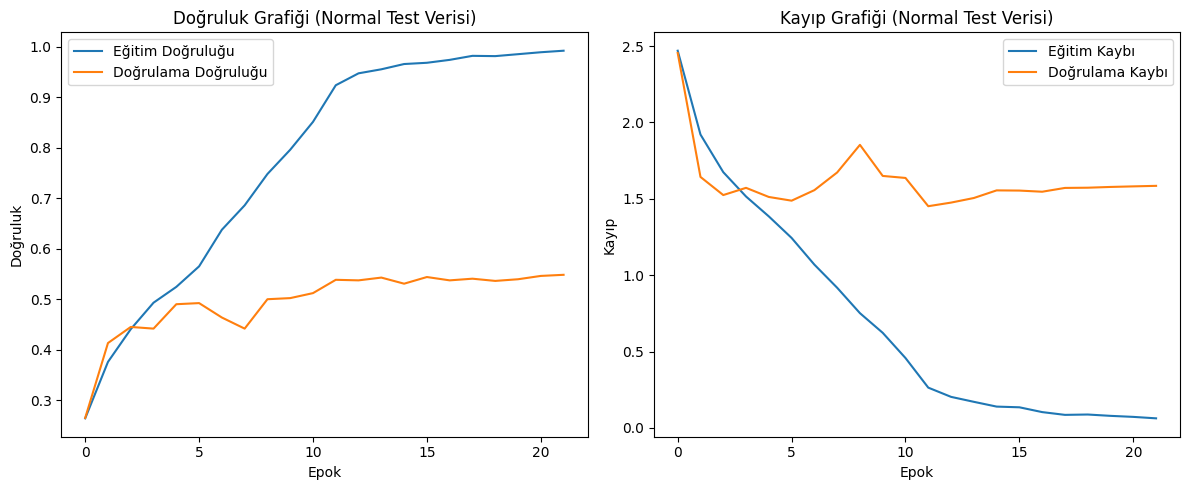

In [14]:
# Eğitim ve Doğrulama Sonuçlarını Görselleştirme
def plot_training_history(history, title_suffix=""):
    plt.figure(figsize=(12, 5))

    # Accuracy grafiği
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
    plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
    plt.title(f'Doğruluk Grafiği {title_suffix}')
    plt.xlabel('Epok')
    plt.ylabel('Doğruluk')
    plt.legend()

    # Loss grafiği
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Eğitim Kaybı')
    plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
    plt.title(f'Kayıp Grafiği {title_suffix}')
    plt.xlabel('Epok')
    plt.ylabel('Kayıp')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history, "(Normal Test Verisi)")


# Confusion Matrix ve Sınıflandırma Raporu 

Bu kod, modelin test seti üzerindeki performansını daha ayrıntılı bir şekilde değerlendirmek için **sınıflandırma raporu** ve **confusion matrix** (karışıklık matrisi) görselleştirmeleri oluşturur.

#### Temel Amaç:
- Modelin tahmin performansını daha ayrıntılı bir şekilde incelemek.
- **Sınıflandırma raporu** ve **confusion matrix** kullanarak modelin doğruluğunu, hata oranlarını ve diğer metrikleri analiz etmek.

#### Adımlar:
1. **Sınıflandırma Raporu**:
   - **`model.predict(X_test)`**: Test seti üzerindeki tahminleri almak.
   - **`np.argmax(y_pred, axis=1)`**: Tahmin edilen sınıf etiketlerini alır (en yüksek olasılığı olan sınıf).
   - **`np.argmax(y_test, axis=1)`**: Gerçek etiketleri alır (one-hot encoded formatta).
   - **`classification_report(y_true, y_pred, target_names=CLASSES)`**: **F1 skoru**, **precision**, **recall** ve **accuracy** gibi metriklerin yer aldığı sınıflandırma raporunu yazdırır.
   
2. **Confusion Matrix (Karışıklık Matrisi)**:
   - **`confusion_matrix(y_true, y_pred)`**: Gerçek ve tahmin edilen etiketler arasındaki karışıklığı hesaplar.
   - **`sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)`**: Karışıklık matrisini görselleştirir. `annot=True` ile her hücrede değerler gösterilir, `cmap='Blues'` ile renk tonları mavi olur.
   - **`plt.xlabel('Tahmin Edilen')`** ve **`plt.ylabel('Gerçek')`**: Eksen etiketlerini ayarlar.

#### Kullanım:
- **Sınıflandırma raporu**: Modelin tahminlerinin doğruluğu, precision, recall ve F1 skorları gibi istatistiklerle detaylandırılır.
- **Confusion Matrix**: Modelin hangi sınıflarda daha fazla hata yaptığını ve hangi sınıfların doğru tahmin edildiğini görsel olarak gösterir.

#### Çıktılar:
- **Sınıflandırma Raporu**: Her bir sınıf için precision, recall, F1 skoru ve accuracy metrikleri.
- **Confusion Matrix**: Gerçek ve tahmin edilen etiketlerin karışıklığını gösteren görsel matriks.


### Confusion Matrix Yorumlaması

Confusion matrix sonuçlarına göre modelin performansı farklı sınıflar üzerinde farklılık göstermektedir.

- **En İyi Sınıflar**: Model, **dolphin** ve **moose** sınıflarında en doğru tahminleri yapmaktadır. Bu sınıflar, modelin başarıyla sınıflandırdığı ve yüksek doğruluk oranlarına sahip olduğu sınıflardır.
  
- **En Kötü Sınıf**: **Rabbit** sınıfı, modelin en kötü tahmin yaptığı sınıf olarak öne çıkmaktadır. Bu sınıf, sıklıkla yanlış sınıflandırılmaktadır.

- **Rabbit ve Elephant Karışıklığı**: Özellikle **rabbit** ve **elephant** sınıfları arasında dikkat çekici bir karışıklık gözlemlenmiştir. Model, bu iki sınıfı birbirine yakın sonuçlarla sınıflandırmaktadır. Bu durum, modelin bu iki sınıfı ayırt etmede zorlandığını göstermektedir.

- **Rabbit Sınıfındaki Sıkıntı**: **Rabbit** sınıfı, genel olarak modelin sıklıkla hata yaptığı bir sınıf olmuştur. Bu sınıfın tahminlerinde tutarsızlık ve sık sık yanlış sınıflandırmalar görülmektedir.

Sonuç olarak, modelin belirli sınıflarda başarılı olduğu, ancak **rabbit** ve **elephant** gibi bazı sınıflar arasında karışıklık yaşadığı ve **rabbit** sınıfında daha belirgin hatalar yaptığı anlaşılmaktadır. 

61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step
Sınıflandırma Raporu (Normal Test Verisi):
              precision    recall  f1-score   support

      collie       0.44      0.46      0.45       178
     dolphin       0.88      0.87      0.88       202
    elephant       0.60      0.65      0.62       189
         fox       0.53      0.46      0.49       191
       moose       0.85      0.75      0.80       218
      rabbit       0.46      0.38      0.42       195
       sheep       0.65      0.70      0.67       189
    squirrel       0.47      0.49      0.48       196
 giant+panda       0.52      0.57      0.55       202
  polar+bear       0.43      0.47      0.45       190

    accuracy                           0.59      1950
   macro avg       0.58      0.58      0.58      1950
weighted avg       0.59      0.59      0.59      1950



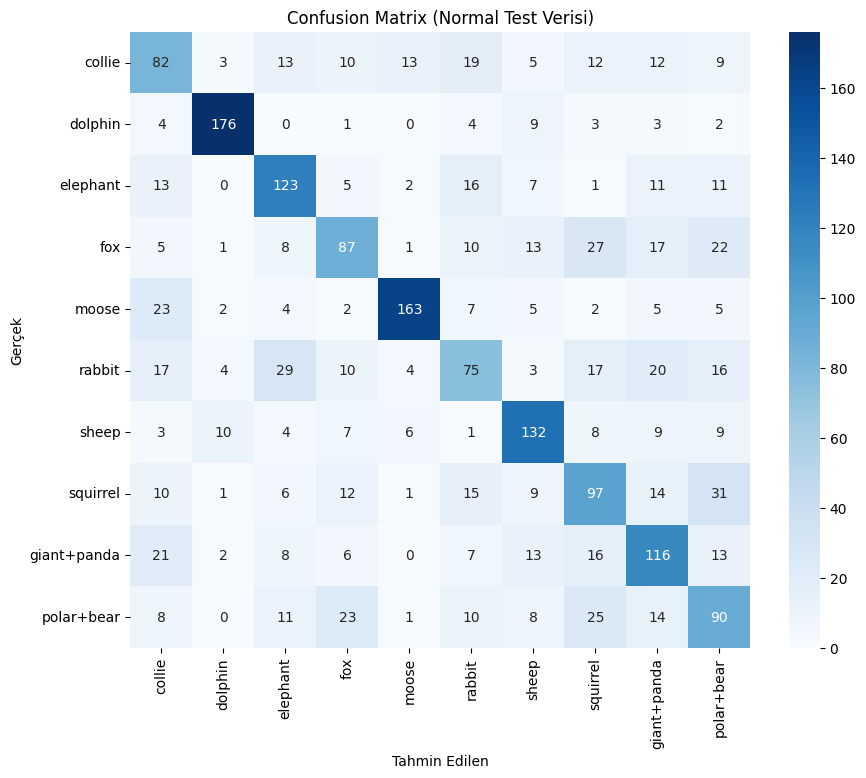

In [15]:
# Confusion Matrix ve Sınıflandırma Raporu
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Sınıflandırma raporu
print("Sınıflandırma Raporu (Normal Test Verisi):")
print(classification_report(y_true, y_pred, target_names=CLASSES))

# Confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, title_suffix=""):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Tahmin Edilen')
    plt.ylabel('Gerçek')
    plt.title(f'Confusion Matrix {title_suffix}')
    plt.show()

plot_confusion_matrix(y_true, y_pred, CLASSES, "(Normal Test Verisi)")


# Resimlerin Farklı Işıklar ile Manipüle Edilmesi ve Model Değerlendirmesi 

Bu kod, test setindeki resimlerin ışık koşullarını manipüle ederek modelin bu değişikliklere karşı dayanıklılığını test eder. Manipülasyon, resimlerin parlaklık ve kontrastını rastgele değiştirerek yapılır.

#### Temel Amaç:
- Resimlerin farklı ışık koşulları altında nasıl performans gösterdiğini görmek.
- Modelin ışık değişimlerine karşı dayanıklılığını test etmek.

#### Adımlar:
1. **Resim Manipülasyonu (Işık Değişimi)**:
   - **`cv2.convertScaleAbs(img, alpha=random.uniform(0.5, 1.5), beta=random.randint(-50, 50))`**: 
     - **`alpha`**: Kontrastı değiştiren bir faktördür. Bu faktör rastgele 0.5 ile 1.5 arasında bir değere seçilir.
     - **`beta`**: Parlaklığı değiştiren bir kayma terimidir. Bu değer rastgele -50 ile 50 arasında seçilir.
   - **`get_manipulated_images(images)`**: Bu fonksiyon, tüm test resimleri üzerinde yukarıdaki ışık manipülasyonlarını uygular.

2. **Manipüle Edilmiş Test Seti Üzerinde Modelin Değerlendirilmesi**:
   - **`model.evaluate(X_test_manipulated, y_test)`**: Manipüle edilmiş test seti üzerinde modelin kayıp (loss) ve doğruluk (accuracy) değerlerini hesaplar.
   - **`print(f"Manipüle Edilmiş Test Seti Doğruluğu: {test_accuracy_manipulated:.4f}")`**: Manipüle edilmiş test seti üzerindeki doğruluk değeri yazdırılır.

#### Kullanım:
- **Manipülasyon**: Test setindeki her bir resme rastgele kontrast ve parlaklık değişiklikleri uygulanır.
- **Değerlendirme**: Manipüle edilmiş veriler ile modelin doğruluk oranı test edilir.

#### Çıktılar:
- Manipüle edilmiş test seti üzerindeki **doğruluk** değeri, modelin ışık değişimlerine karşı gösterdiği performansı yansıtır.


In [16]:
# Resimlerin Farklı Işıklar ile Manipüle Edilmesi
def get_manipulated_images(images):
    manipulated_images = []
    for img in images:
        manipulated_img = cv2.convertScaleAbs(img, alpha=random.uniform(0.5, 1.5), beta=random.randint(-50, 50))
        manipulated_images.append(manipulated_img)
    return np.array(manipulated_images)

X_test_manipulated = get_manipulated_images(X_test)

# Manipüle edilmiş test seti üzerinde modelin değerlendirilmesi
test_loss_manipulated, test_accuracy_manipulated = model.evaluate(X_test_manipulated, y_test)
print(f"Manipüle Edilmiş Test Seti Doğruluğu: {test_accuracy_manipulated:.4f}")


61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.1028 - loss: 325.4513
Manipüle Edilmiş Test Seti Doğruluğu: 0.1067


# Renk Sabitliği Algoritması Uygulanması ve Model Değerlendirmesi 

Bu kod, test setindeki resimlere renk sabitliği algoritması uygular. Renk sabitliği, görüntüdeki renk dengesizliğini düzeltmek amacıyla yapılır ve genellikle ışıklandırma değişikliklerinin model performansını etkilemesini azaltmaya yardımcı olur.

#### Temel Amaç:
- Resimler üzerinde renk sabitliği uygulayarak modelin ışık ve renk koşullarındaki değişimlere karşı nasıl performans gösterdiğini test etmek.

#### Adımlar:
1. **Renk Sabitliği (Gray World Algoritması)**:
   - **`avg_bgr = np.mean(img, axis=(0, 1))`**: Resmin her bir kanalındaki (mavi, yeşil, kırmızı) ortalama değerlerini hesaplar.
   - **`gray_world_img = img * (avg_bgr.mean() / avg_bgr)`**: Ortalama renk değerlerini, tüm resmin renk tonlarını normalize etmek için kullanır. Bu, genellikle "Gray World" algoritması olarak bilinir ve görüntüyü renk dengesizliğinden arındırır.
   - **`np.clip(gray_world_img, 0, 255).astype(np.uint8)`**: Değeri 0 ile 255 arasında sınırlayarak görüntüdeki piksel değerlerini uygun bir aralığa getirir.
   - **`get_wb_images(images)`**: Bu fonksiyon, tüm test resimleri üzerinde renk sabitliği uygulayarak yeni bir görüntü kümesi oluşturur.

2. **Renk Sabitliği Uygulanmış Test Seti Üzerinde Modelin Değerlendirilmesi**:
   - **`model.evaluate(X_test_wb, y_test)`**: Renk sabitliği uygulanmış test seti üzerinde modelin kayıp (loss) ve doğruluk (accuracy) değerlerini hesaplar.
   - **`print(f"Renk Sabitliği Uygulanmış Test Seti Doğruluğu: {test_accuracy_wb:.4f}")`**: Renk sabitliği uygulanmış test setindeki doğruluk oranı yazdırılır.

#### Kullanım:
- **Renk Sabitliği Algoritması**: Test setindeki her bir resme renk sabitliği uygulayarak, resimlerin renk dengesini düzeltir.
- **Değerlendirme**: Renk sabitliği uygulanmış test seti ile modelin doğruluk oranı test edilir.

#### Çıktılar:
- Renk sabitliği uygulanmış test seti üzerindeki **doğruluk** değeri, modelin renk ve ışık değişimlerine karşı gösterdiği performansı yansıtır.


In [17]:
#  Renk Sabitliği Algoritması Uygulanması
def get_wb_images(images):
    wb_images = []
    for img in images:
        avg_bgr = np.mean(img, axis=(0, 1))
        gray_world_img = img * (avg_bgr.mean() / avg_bgr)
        wb_images.append(np.clip(gray_world_img, 0, 255).astype(np.uint8))
    return np.array(wb_images)

X_test_wb = get_wb_images(X_test_manipulated)

# Renk sabitliği uygulanmış test seti üzerinde modelin değerlendirilmesi
test_loss_wb, test_accuracy_wb = model.evaluate(X_test_wb, y_test)
print(f"Renk Sabitliği Uygulanmış Test Seti Doğruluğu: {test_accuracy_wb:.4f}")


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.0988 - loss: 319.3826
Renk Sabitliği Uygulanmış Test Seti Doğruluğu: 0.1015


# Görüntülerin Kontrolü ve Görselleştirilmesi

Bu kod, belirli sayıda resmi görselleştirmek ve bu resimlerin üzerinde yapılan manipülasyonları kontrol etmek için kullanılır. Manipüle edilmiş ve renk sabitliği uygulanmış resimlerin görselleştirilmesi için iki test seti görselleştirilir.

#### Temel Amaç:
- Manipüle edilmiş test setindeki ve renk sabitliği uygulanmış test setindeki resimleri görselleştirerek yapılan değişiklikleri gözlemlemek.

#### Adımlar:
1. **Resimlerin Kontrolü ve Görselleştirilmesi**:
   - **`check_and_show_images(images, num_images=10)`** fonksiyonu, verilen görüntü kümesindeki belirli sayıda (varsayılan olarak 10) resmi görselleştirir. Görüntüler daha büyük ve daha net bir şekilde görünmesi için normalizasyon ve kontrast iyileştirmeleri yapılır.
   - **Min-Max Normalizasyonu**: Resimler, min-max normalizasyonu uygulanarak daha iyi bir kontrasta sahip olur.
   - **`plt.subplot(2, 5, i + 1)`**: 2 satır ve 5 sütundan oluşan bir grid üzerinde her resmi gösterir.

2. **Manipüle Edilmiş Test Setinin Görselleştirilmesi**:
   - `check_and_show_images(X_test_manipulated[:10])`: Manipüle edilmiş test setindeki ilk 10 resmi görselleştirir.
   - **Görselleştirme**: Bu resimler, ışık değişiklikleri (parlaklık ve kontrast) uygulandıktan sonra nasıl göründüklerini gösterir.

3. **Renk Sabitliği Uygulanmış Test Setinin Görselleştirilmesi**:
   - `check_and_show_images(X_test_wb[:10])`: Renk sabitliği uygulanmış test setindeki ilk 10 resmi görselleştirir.
   - **Görselleştirme**: Bu resimler, renk sabitliği algoritmasının etkilerini ve görüntüdeki renk dengesi düzeltmelerini gösterir.

#### Kullanım:
- **Manipülasyonların Görselleştirilmesi**: Manipüle edilmiş ve renk sabitliği uygulanmış resimler görselleştirilerek, bu işlemlerin görsel etkileri gözlemlenir.

#### Çıktılar:
- **Manipüle Edilmiş Resimler**: Işık değişikliklerinin (parlaklık, kontrast) etkisiyle görselleştirilmiş ilk 10 resim.
- **Renk Sabitliği Uygulanmış Resimler**: Renk sabitliği algoritmasının uygulanması sonrası elde edilen ilk 10 resim.

Bu görselleştirme, resimlerde yapılan değişikliklerin görsel etkilerini gözler önüne serer ve modelin bu değişikliklere karşı nasıl performans gösterdiğini daha iyi anlamamıza yardımcı olur.


Manipulated Images:


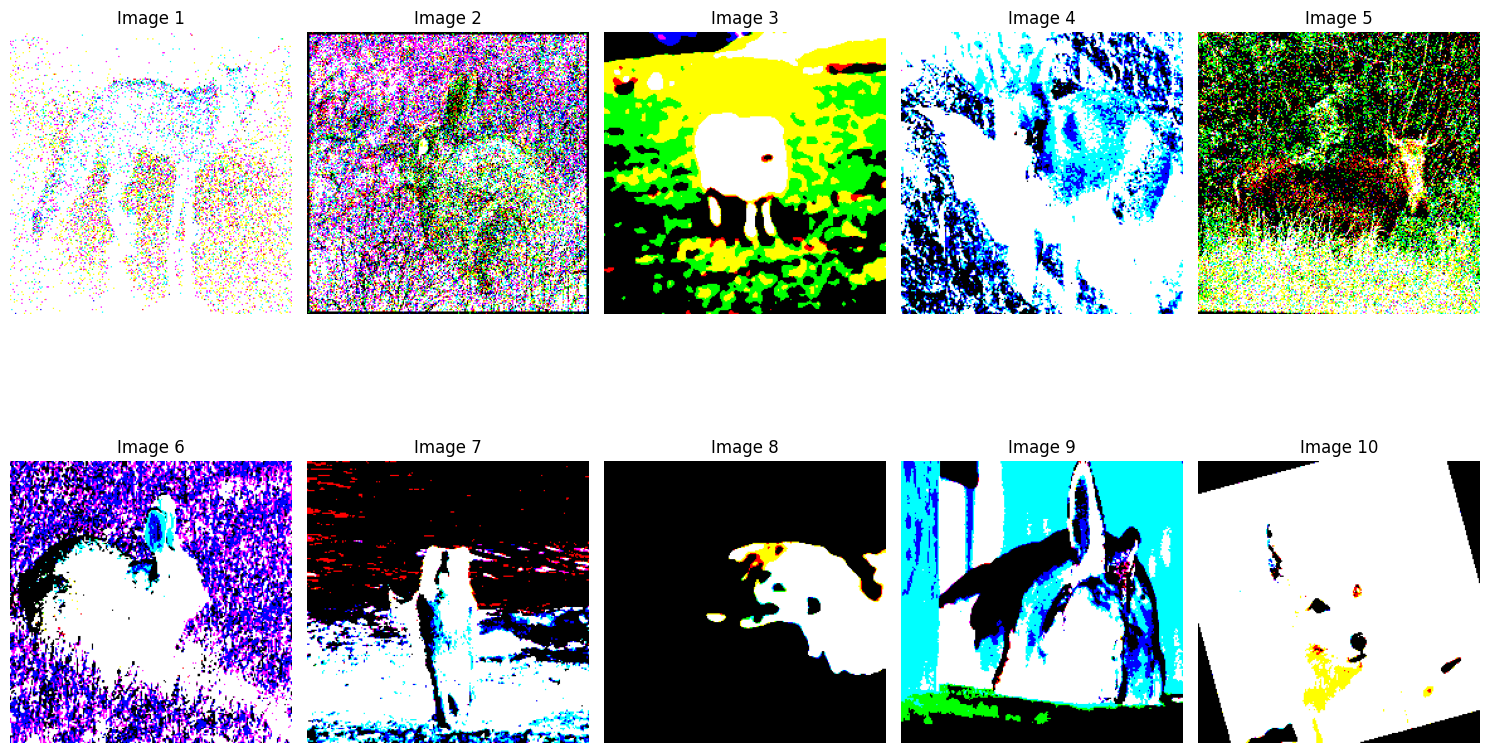

White-balanced Images:


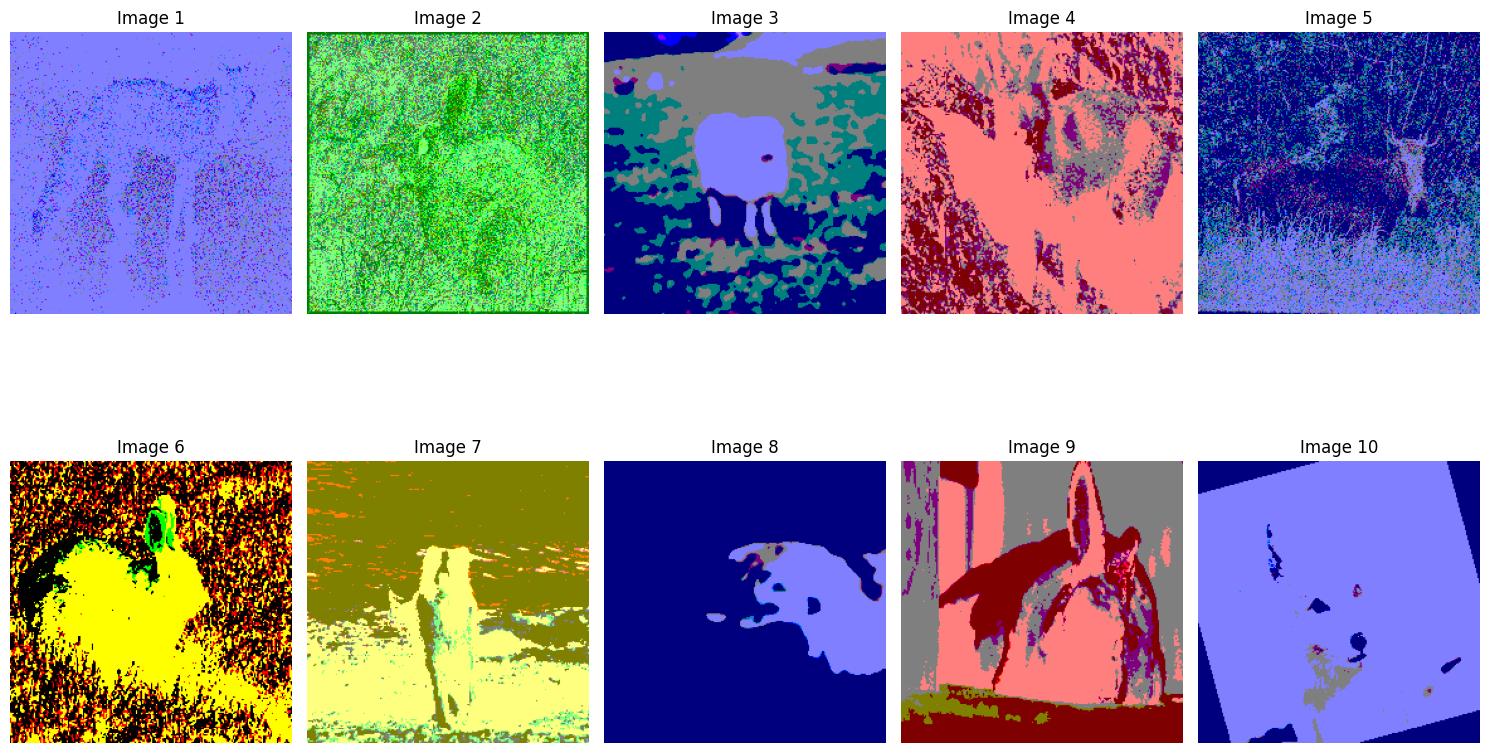

In [34]:
def check_and_show_images(images, num_images=10):
    plt.figure(figsize=(15, 10))  # Görüntülerin daha büyük görünmesini sağlar
    for i in range(num_images):
        img = images[i]

        # Eğer resimler uint8 tipindeyse, normalize edilerek 0-1 aralığına çek
        if img.dtype == np.uint8:
            img = img.astype(np.float32) / 255.0  # 0-255'ten 0-1 aralığına dönüştür

        # Kontrastı artırmak için normalize edelim
        img = (img - img.min()) / (img.max() - img.min())  # Min-max normalizasyon

        plt.subplot(2, 5, i + 1)  # 2 satır, 5 sütunlu bir grid üzerinde göster
        plt.imshow(img)  # Görüntüyü göster
        plt.axis('off')  # Eksenleri gizle

        plt.title(f"Image {i+1}")

    plt.tight_layout()
    plt.show()

# Manipüle edilmiş test setindeki ilk 10 resmi kontrol et
print("Manipulated Images:")
check_and_show_images(X_test_manipulated[:10])

# Renk sabitliği uygulanmış test setindeki ilk 10 resmi kontrol et
print("White-balanced Images:")
check_and_show_images(X_test_wb[:10])


# Farklı Test Setlerinin Başarılarını Karşılaştırma ve Raporlama

Bu adım, modelin farklı test setleri üzerindeki doğruluk performansını karşılaştırarak, ışık manipülasyonları ve renk sabitliği uygulamalarının model üzerindeki etkilerini raporlar.

#### Temel Amaç:
- Farklı test setleri kullanılarak modelin performansını analiz etmek.
- Normal test seti, manipüle edilmiş test seti ve renk sabitliği uygulanmış test seti üzerindeki doğrulukları karşılaştırmak.

#### Adımlar:
1. **Farklı Test Setlerinin Değerlendirilmesi**:
   - **Normal Test Seti**: Modelin orijinal test verisi üzerindeki doğruluğu.
   - **Manipüle Edilmiş Test Seti**: Işık değişiklikleri (parlaklık ve kontrast) uygulanmış test verisi üzerindeki doğruluk.
   - **Renk Sabitliği Uygulanmış Test Seti**: Renk sabitliği algoritması ile düzeltme yapılmış test verisi üzerindeki doğruluk.

2. **Sonuçların Karşılaştırılması**:
   - `print(f"Normal Test Seti Doğruluğu: {test_accuracy:.4f}")`: Normal test setindeki doğruluk değeri yazdırılır.
   - `print(f"Manipüle Edilmiş Test Seti Doğruluğu: {test_accuracy_manipulated:.4f}")`: Manipüle edilmiş test setindeki doğruluk değeri yazdırılır.
   - `print(f"Renk Sabitliği Uygulanmış Test Seti Doğruluğu: {test_accuracy_wb:.4f}")`: Renk sabitliği uygulanmış test setindeki doğruluk değeri yazdırılır.

#### Kullanım:
- **Performans Karşılaştırması**: Farklı test setleri üzerindeki doğruluk değerleri karşılaştırılarak, modelin ışık değişikliklerine ve renk düzeltmelerine karşı ne kadar dayanıklı olduğu değerlendirilir.

#### Çıktılar:
- **Doğruluk Raporu**: 
  - Normal test seti doğruluğu
  - Manipüle edilmiş test seti doğruluğu
  - Renk sabitliği uygulanmış test seti doğruluğu

Bu karşılaştırma, modelin genelleme yeteneğini ve farklı veri manipülasyonlarına karşı gösterdiği performansı anlamamıza yardımcı olur.


In [18]:
# 9. Farklı Test Setlerinin Başarılarını Karşılaştırma ve Raporlama
print("Sonuç Karşılaştırması:")
print(f"Normal Test Seti Doğruluğu: {test_accuracy:.4f}")
print(f"Manipüle Edilmiş Test Seti Doğruluğu: {test_accuracy_manipulated:.4f}")
print(f"Renk Sabitliği Uygulanmış Test Seti Doğruluğu: {test_accuracy_wb:.4f}")


Sonuç Karşılaştırması:
Normal Test Seti Doğruluğu: 0.5851
Manipüle Edilmiş Test Seti Doğruluğu: 0.1067
Renk Sabitliği Uygulanmış Test Seti Doğruluğu: 0.1015
